In [1]:
from utility_dfcounter import *

In [17]:
nGen = pd.read_pickle("../data/pickles/ngen.pkl")
counts = pd.read_pickle("../data/counts/count_.pkl")

In [32]:
itr = 0
ich = 0

accStd0_1b = common.matrixToArray( counts.accsVar[itr][ich,2,:,:]**0.5 )
acc0_1b    = common.matrixToArray( counts.accs[itr][ich,2,:,:] )
accStd_1b  = common.matrixToArray( counts.accsVar[itr][ich,0,:,:]**0.5 )
acc_1b     = common.matrixToArray( counts.accs[itr][ich,0,:,:] )

accStd0_2b = common.matrixToArray( counts.accsVar[itr+1][ich,2,:,:]**0.5 )
acc0_2b    = common.matrixToArray( counts.accs[itr+1][ich,2,:,:] )
accStd_2b  = common.matrixToArray( counts.accsVar[itr+1][ich,0,:,:]**0.5 )
acc_2b     = common.matrixToArray( counts.accs[itr+1][ich,0,:,:] )



for i in range(21):
    print('{:0>6.3f}+/-{:0>6.3f} , {:0>6.3f}+/-{:0>6.3f} , {:0>6.3f}+/-{:0>6.3f} , {:0>6.3f}+/-{:0>6.3f}'.format(
            acc0_1b[i]*100, accStd0_1b[i]*100, acc_1b[i]*100, accStd_1b[i]*100,
            acc0_2b[i]*100, accStd0_2b[i]*100, acc_2b[i]*100, accStd_2b[i]*100)
         )

00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.001+/-00.000 , 00.002+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
04.978+/-00.011 , 04.965+/-00.005 , 01.617+/-00.007 , 01.602+/-00.003
00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.001+/-00.002 , 00.001+/-00.001 , 00.000+/-00.000 , 00.000+/-00.000
00.995+/-00.030 , 00.973+/-00.012 , 00.297+/-00.016 , 00.311+/-00.007
00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.006+/-00.001 , 00.004+/-00.000 , 00.002+/-00.001 , 00.001+/-00.000
00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.000+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
01.369+/-00.015 , 01.365+/-00.006 , 00.434+/-00.008 , 00.429+/-00.003
00.001+/-00.000 , 00.001+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
03.063+/-00.021 , 03.087+/-00.009 , 00.993+/-00.012 , 00.995+/-00.005
00.002+/-00.001 , 00.002+/-00.000 , 00.000+/-00.000 , 00.000+/-00.000
00.013+/-00.001 , 00

In [18]:
nGenMCtt2l = nGen.query("name=='tt_2l2nu'").ngen.values[0]
nGenMCtt   = nGen.query("name=='tt'").ngen.values[0]

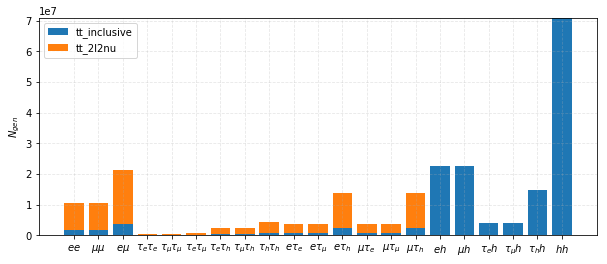

In [33]:
ind = np.arange(21)
branches = common.WWBranchNames()
plt.figure(facecolor='w',figsize=(10,4))




plt.bar(ind,nGenMCtt,label='tt_inclusive')
plt.bar(ind,nGenMCtt2l, bottom=nGenMCtt,label='tt_2l2nu')

plt.ylabel(r'$N_{gen}$')
#plt.yscale('log')
#plt.ylim(2e4,1e8)
plt.grid(linestyle='--',alpha=0.3)

plt.xticks(ind, branches)
plt.legend()
plt.savefig('../plots/ngen_comparison.png',dpi=300)